In [9]:
import numpy as np
import math 
import pylab
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import cm, colors
import random

In [10]:
class Protein(object):
    def __init__(self, sequence, conformation):
        self.sequence = sequence
        self.conformation = conformation
        
    def count_proteins_contacts(self):
        """Для данного белка считает число топологических контактов HH."""
        hh=0
        steps = [(1, 0), (-1, 0), (0, 1),  (0, -1)]
        for i in range(1, len(self.conformation)-1):
            not_topological=[self.conformation [i-1], self.conformation[i+1]]
            for step in steps:
                new_point = (self.conformation[i][0]+step[0], self.conformation [i][1]+step[1] )
                if (new_point in self.conformation  and (new_point not in not_topological)):
                    position = self.conformation.index(new_point)
                    if( self.sequence[position]==1 and self.sequence[i]==1 ):
                        hh=hh+1
        for step in steps:
            new_point_begin = (self.conformation[0][0]+step[0], self.conformation[0][1]+step[1] )
            new_point_end= ( self.conformation[-1][0]+step[0], self.conformation [-1][1]+step[1])
            if(new_point_begin in self.conformation  and new_point_begin!=self.conformation [1]):
                position = self.conformation.index(new_point_begin)
                if( self.sequence[position]==1 and self.sequence[0]==1 ):
                    hh=hh+1
            if( new_point_end in self.conformation  and new_point_end!=self.conformation[-2]):
                position = self.conformation.index(new_point_end) 
                if( self.sequence[position]==1 and self.sequence[-1]==1 ):
                    hh=hh+1
        return hh//2
     

In [11]:
L_min=2
L_max=12
steps = [(1, 0), (-1, 0), (0, 1),  (0, -1)]

In [12]:
one_over_lengths=0
lengths=range(L_min, L_max+1)

for i in lengths:
    one_over_lengths=one_over_lengths+1/i

k=1/one_over_lengths


probabilities = []
for i in lengths:
    probabilities.append(k/i)
    
print(probabilities)
print(sum(probabilities))

[0.23773177132467707, 0.1584878475497847, 0.11886588566233854, 0.09509270852987083, 0.07924392377489235, 0.06792336323562202, 0.05943294283116927, 0.052829282516594904, 0.04754635426493541, 0.04322395842266856, 0.039621961887446176]
0.9999999999999998


In [13]:
st='HHPHPHPHPHHHHPHPPPHPPPHPPPPHPPPHPPPHPHHHHPHPHPHPHH'
length = len(st)
sequence_example=[]
for c in st:
    if c=='H':
        sequence_example.append(1)
    else:
        sequence_example.append(0)
print(sequence_example)
print(len(sequence_example))

[1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1]
50


In [14]:
T = 2.5 #температура фиксирована 
n_interations = 100 #пока фиксирую число итераций так 


In [244]:
start_conformation = [(0, 0)]
for i in range(1,50):
    if (i%8>0 and i%8<4):
        new_coordinate = (start_conformation[-1][0],start_conformation[-1][1]+1)
    elif (i%8>4 and i%8<=7):
        new_coordinate = (start_conformation[-1][0],start_conformation[-1][1]-1)
    else:
        new_coordinate = (start_conformation[-1][0]+1,start_conformation[-1][1])
    start_conformation.append(new_coordinate)
print(start_conformation)
print(len(start_conformation))

[(0, 0), (0, 1), (0, 2), (0, 3), (1, 3), (1, 2), (1, 1), (1, 0), (2, 0), (2, 1), (2, 2), (2, 3), (3, 3), (3, 2), (3, 1), (3, 0), (4, 0), (4, 1), (4, 2), (4, 3), (5, 3), (5, 2), (5, 1), (5, 0), (6, 0), (6, 1), (6, 2), (6, 3), (7, 3), (7, 2), (7, 1), (7, 0), (8, 0), (8, 1), (8, 2), (8, 3), (9, 3), (9, 2), (9, 1), (9, 0), (10, 0), (10, 1), (10, 2), (10, 3), (11, 3), (11, 2), (11, 1), (11, 0), (12, 0), (12, 1)]
50


In [249]:
xplot = []
yplot = []
for i in start_conformation:
    xplot.append(i[0])
    yplot.append(i[1])
markers = list(matplotlib.lines.Line2D.markers)

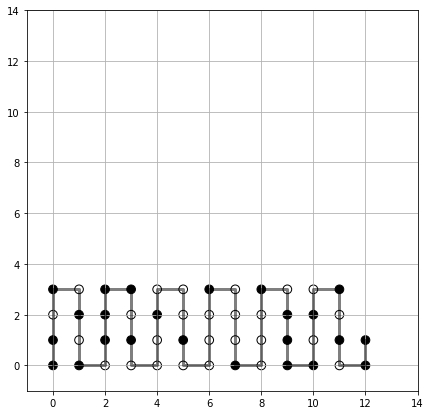

In [250]:
plt.figure(figsize=(7,7 ))

plt.plot(xplot, yplot, '-', color = 'k', lw=3,markersize=9,alpha=0.5)

plt.scatter(xplot, yplot, c=sequence_example, s=75, edgecolors='k',  cmap='Greys', alpha = 1)

plt.xlim(-1, 14)
plt.ylim(-1,14)

#plt.axis('off')

plt.grid(True)

это начальная конформация. 

In [18]:
p = Protein(sequence_example, start_conformation)
q = p.count_proteins_contacts()
print(q)

5


In [19]:
def D(point1, point2):
    "Это расстояние по норме р1."
    return abs(point2[0]-point1[0]) + abs(point2[1]-point1[1])

# Attempt to implement FRESS


In [52]:
#current_conf = start_conformation.copy()
#tobreak=False 

def regrowth_middle(start_conformation, sequence_example, l,  start_position ):
    
    current_conf = start_conformation.copy()
    
    #l=4
 
    #l = np.random.choice(lengths, 1, p=probabilities)[0] #длина фрагмента, который будет изменяться 

    #end = length-l
    
    #end = len(start_conformation) - l 
    
    #start_position = random.randint(0,end-1) #случайно выбранная позиция  для regrowth 
    
    
    #я тут мб поменяю чуть позже так, чтобы можно было проводить это и с конца, но пока так 
    
    #start_position=end-1

    end_position = start_position+l-1

    C_t= current_conf[:start_position]+current_conf[end_position+1:]

    Seq_t=sequence_example[:start_position]+sequence_example[end_position+1:]
    

    p=Protein(Seq_t, C_t)
    E_t=p.count_proteins_contacts()
    #print("E_t : ", E_t)
    
    
    #Первый шаг обрабатываю отдельно, чтобы поменять направление. 
    
    
    first_moves=[]
    
    for step in steps:
        point = (C_t[start_position-1][0]+step[0], C_t[start_position-1][1]+step[1])
        
        if (point == current_conf[start_position]):
            continue
            #проверка на старую точку, чтобы не начать regrowth в том же направлении, что и у старой конфигурации  
        if ((point not in C_t )and D(point, current_conf[end_position+1])<=abs(end_position+1-start_position)):
            first_moves.append(point)
            #проверка на самопересечения и возможность из потенциальной точки достичь оборванную часть цепочки 
  
    if(len(first_moves)==0):
        return start_conformation.copy() # to function 
    else:
        # процесс продолжается, если есть доступные первые шаги 
        ind=[]
        for q in range(len(first_moves)):
            ind.append(q)
        
        Seq_t_j=sequence_example[:start_position]+[sequence_example[start_position]]+sequence_example[end_position+1:] 
        
        
        accept_first = []
        
        for first_move in first_moves:
            C_t_j = current_conf[:start_position]+[first_move]+current_conf[end_position+1:]
            
            pnew = Protein(Seq_t_j ,C_t_j)
            Enew = pnew.count_proteins_contacts()
            acceptance = math.exp(-(Enew-E_t)/T) 
            #чтобы вероятности были пропоциональны значениям acceptance 
            accept_first.append(acceptance)
      
        accept_prob_first=[]
        
        
        tobrob=sum(accept_first)
        #тут я попыталась рассчитать вероятности 
        
        
        for u in accept_first:
            accept_prob_first.append(u/tobrob)
        
    
        
        p_t_j =np.random.choice(ind, 1, p=accept_prob_first)[0]  #
 
        C_t=current_conf[:start_position]+[first_moves[p_t_j]]+current_conf[end_position+1:]
        Seq_t=Seq_t_j.copy()

            
        ros_weight_new=accept_prob_first[p_t_j]#I suppose it is the Rosenbluth weight for new conformation 
        
        for t in range(start_position+1, end_position+1):
           
            moves = [] 
            for step in steps:
                point = (C_t[t-1][0]+step[0], C_t[t-1][1]+step[1])
                if ((point not in C_t )and D(point, current_conf[end_position+1])<=abs(end_position+1-t)):
                    moves.append(point)
                    
            if(len(moves)==0):
                
                break 
                
            else: 
                Seq_t_j=sequence_example[:t]+[sequence_example[t]]+sequence_example[end_position+1:]
                ind=[]
                for q in range(len(moves)):
                    ind.append(q)
                    
                acceptance = [] 
                for move in moves:
                    C_t_j =  C_t[:t]+[move]+current_conf[end_position+1:]
                    
                    pnew = Protein(Seq_t_j ,C_t_j)
                    Enew = pnew.count_proteins_contacts()
                    acceptance.append(math.exp(-(Enew-E_t)/T) )
                to_prob = sum(acceptance)
                
                prob_acceptance = []
                for u in acceptance:
                    prob_acceptance.append(u/to_prob)
                
                
                p_t_j=np.random.choice(ind, 1, p =prob_acceptance)[0]
                
                C_t=  C_t[:t]+[moves[p_t_j]]+current_conf[end_position+1:]
                ros_weight_new=ros_weight_new*prob_acceptance[p_t_j]
               
          
                #Seq_t=Seq_t_j.copy()
                        
             
            
            
                
    if(len(C_t)==length):
        #print("move did", end= " ")
        pnew = Protein(sequence_example,C_t)
        Enew =pnew.count_proteins_contacts()
        enew = math.exp(-(Enew-E_t)/T)
       
        #пока любую новую конформацию принимаю с вероятностью 1 
        current_conf=C_t.copy()
        return current_conf

    #continue    
        
    return start_conformation
    
    

        
    
    

In [82]:
q=0
for i in range(100):
    q = q+ random.randint(0, 1)
print(q)

43


In [251]:
#current_conf = regrowth_middle(start_conformation, sequence_example, 5, 16)
k = 0 
for i in range(1 ):
    
    l = np.random.choice(lengths, 1, p=probabilities)[0] #длина фрагмента, который будет изменяться 
    
    #q=  random.randint(0, 1)
    #if(q==0):
    
    print("l= ", l)
    #start_position = random.randint(0,length-l)
    
    
   # else:
        #start_position = random.randint(l,length-1)
    start_position=length-l
    #start_position=0
    if(start_position!=0 and start_position!= (length-l)):
        current_conf = regrowth_middle(start_conformation, sequence_example, l, start_position)
    elif(start_position==0):
        current_conf = regrowth_start(start_conformation, sequence_example, l)
    else: 
        current_conf=regrowth_end(start_conformation, sequence_example, l)
        
        
        
        
    if( start_conformation!=current_conf):
        k=k+1
        #print(k, i, end = " ")
        
    
    #start_conformation=current_conf.copy()
    
print(k)

l=  4
[(12, 2)]
len ct  47
t 47
[(13, 2), (12, 3), (12, 1)]
ct after  48
t 48
[(14, 2), (13, 3), (13, 1)]
ct after  49
t 49
[(14, 1), (12, 1), (13, 0)]
ct after  50
move did 1


50


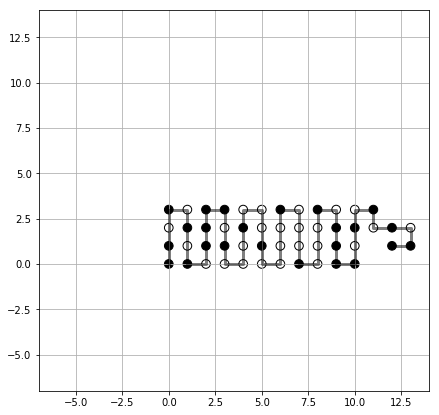

In [252]:
xplot = []
yplot = []
for i in current_conf:
    xplot.append(i[0])
    yplot.append(i[1])
markers = list(matplotlib.lines.Line2D.markers)
print(len(current_conf))
plt.figure(figsize=(7,7 ))

plt.plot(xplot, yplot, '-', color = 'k', lw=3,markersize=9,alpha=0.5)
#plt.plot(first_moves[0][0], first_moves[0][1])
plt.scatter(xplot, yplot,c=sequence_example,  s=75, edgecolors='k',  cmap='Greys', alpha = 1)

plt.xlim(-7, 14)
plt.ylim(-7,14)

plt.grid(True)

In [231]:
def regrowth_start(start_conformation, sequence_example, l):
    
    current_conf = start_conformation.copy()
    #start_position = l 
    
    C_t= current_conf[l:]

    Seq_t=sequence_example[l:]
    

    p=Protein(Seq_t, C_t)
    E_t=p.count_proteins_contacts()
    #print("E_t : ", E_t)
    
    
    #Первый шаг обрабатываю отдельно, чтобы поменять направление. 
    
    
    first_moves=[]
    
    
        
    for step in steps:
        point = (C_t[0][0]+step[0], C_t[0][1]+step[1])
        
        if (point == current_conf[l-1]):
            continue
            #проверка на старую точку, чтобы не начать regrowth в том же направлении, что и у старой конфигурации  
        if ((point not in C_t ) ):
            first_moves.append(point)
 
  
    print(first_moves)
    if(len(first_moves)==0):
        return start_conformation.copy() # to function 
    else:
        # процесс продолжается, если есть доступные первые шаги 
        ind=[]
        for q in range(len(first_moves)):
            ind.append(q)
        
        Seq_t_j=sequence_example[l-1:] 
        
        
        accept_first = []
    
    
        
        for first_move in first_moves:
            C_t_j = [first_move]+ current_conf[l:]
            pnew = Protein(Seq_t_j ,C_t_j)
            Enew = pnew.count_proteins_contacts()
            acceptance = math.exp(-(Enew-E_t)/T) 
            #чтобы вероятности были пропоциональны значениям acceptance 
            accept_first.append(acceptance)
      
        accept_prob_first=[]
        
        
        tobrob=sum(accept_first)
        
        
        
        for u in accept_first:
            accept_prob_first.append(u/tobrob)
        
    
        
        p_t_j =np.random.choice(ind, 1, p=accept_prob_first)[0]  #
 
        C_t= [first_moves[p_t_j]]+current_conf[l:]
        print("len ct ", len(C_t))
        Seq_t=Seq_t_j.copy()

            
        ros_weight_new=accept_prob_first[p_t_j]
        
        
        
        
        for t in range(l-2, -1, -1): #
            print("t", t)
           
            moves = [] 
            for step in steps:
                point = (C_t[0][0]+step[0], C_t[0][1]+step[1])
                if ((point not in C_t )):
                    moves.append(point)
                    
            print(moves)
            if(len(moves)==0):
                
                break 
                

                
                
            else: 
                Seq_t_j=sequence_example[t:]
                ind=[]
                for q in range(len(moves)):
                    ind.append(q)
                    
                acceptance = [] 
                for move in moves:
                    C_t_j =  C_t[t:]
                    
                    pnew = Protein(Seq_t_j ,C_t_j)
                    Enew = pnew.count_proteins_contacts()
                    acceptance.append(math.exp(-(Enew-E_t)/T) )
                to_prob = sum(acceptance)
                
                prob_acceptance = []
                for u in acceptance:
                    prob_acceptance.append(u/to_prob)
                
                
                p_t_j=np.random.choice(ind, 1, p =prob_acceptance)[0]
                
                C_t=   [moves[p_t_j]]+C_t
                print("ct after ", len(C_t))
                ros_weight_new=ros_weight_new*prob_acceptance[p_t_j]
               


            
            
                
    if(len(C_t)==len(start_conformation)):
        print("move did", end= " ")
        pnew = Protein(sequence_example,C_t)
        Enew =pnew.count_proteins_contacts()
        enew = math.exp(-(Enew-E_t)/T)
       
        #пока любую новую конформацию принимаю с вероятностью 1 
        current_conf=C_t.copy()
        return current_conf

    #continue    
        
    return start_conformation
    
    

In [240]:
def regrowth_end(start_conformation, sequence_example, l):
    
    current_conf = start_conformation.copy()
    #start_position = l 
    n = len(start_conformation)
    C_t= current_conf[:n-l]

    Seq_t=sequence_example[:n-l]
    

    p=Protein(Seq_t, C_t)
    E_t=p.count_proteins_contacts()
    #print("E_t : ", E_t)
    
    
    #Первый шаг обрабатываю отдельно, чтобы поменять направление. 
    
    
    first_moves=[]
    
    
        
    for step in steps:
        point = (C_t[-1][0]+step[0], C_t[-1][1]+step[1])
        
        if (point == current_conf[n-l]):
            continue
            #проверка на старую точку, чтобы не начать regrowth в том же направлении, что и у старой конфигурации  
        if ((point not in C_t ) ):
            first_moves.append(point)
 
  
    print(first_moves)
    if(len(first_moves)==0):
        return start_conformation.copy() # to function 
    else:
        # процесс продолжается, если есть доступные первые шаги 
        ind=[]
        for q in range(len(first_moves)):
            ind.append(q)
        
        Seq_t_j=sequence_example[:n-l+1] 
        
        
        accept_first = []
    
    
        
        for first_move in first_moves:
            C_t_j = C_t+ [first_move]
            pnew = Protein(Seq_t_j ,C_t_j)
            Enew = pnew.count_proteins_contacts()
            acceptance = math.exp(-(Enew-E_t)/T) 
            #чтобы вероятности были пропоциональны значениям acceptance 
            accept_first.append(acceptance)
      
        accept_prob_first=[]
        
        
        tobrob=sum(accept_first)
        
        
        
        for u in accept_first:
            accept_prob_first.append(u/tobrob)
        
    
        
        p_t_j =np.random.choice(ind, 1, p=accept_prob_first)[0]  #
 
        C_t=C_t + [first_moves[p_t_j]] 
        print("len ct ", len(C_t))
        Seq_t=Seq_t_j.copy()

            
        ros_weight_new=accept_prob_first[p_t_j]
        
        
        
        
        for t in range(n-l+1, n): #
            print("t", t)
           
            moves = [] 
            for step in steps:
                point = (C_t[-1][0]+step[0], C_t[-1][1]+step[1])
                if ((point not in C_t )):
                    moves.append(point)
                    
            print(moves)
            if(len(moves)==0):
                
                break 
                

                
                
            else: 
                Seq_t_j=sequence_example[:t]
                ind=[]
                for q in range(len(moves)):
                    ind.append(q)
                    
                acceptance = [] 
                for move in moves:
                    C_t_j =  C_t[:t]
                    
                    pnew = Protein(Seq_t_j ,C_t_j)
                    Enew = pnew.count_proteins_contacts()
                    acceptance.append(math.exp(-(Enew-E_t)/T) )
                to_prob = sum(acceptance)
                
                prob_acceptance = []
                for u in acceptance:
                    prob_acceptance.append(u/to_prob)
                
                
                p_t_j=np.random.choice(ind, 1, p =prob_acceptance)[0]
                
                C_t=  C_t+ [moves[p_t_j]]
                print("ct after ", len(C_t))
                ros_weight_new=ros_weight_new*prob_acceptance[p_t_j]
               


            
            
                
    if(len(C_t)==len(start_conformation)):
        print("move did", end= " ")
        pnew = Protein(sequence_example,C_t)
        Enew =pnew.count_proteins_contacts()
        enew = math.exp(-(Enew-E_t)/T)
       
        #пока любую новую конформацию принимаю с вероятностью 1 
        current_conf=C_t.copy()
        return current_conf

    #continue    
        
    return start_conformation
    
    

In [212]:
a = [1, 2, 3, 4]
print(a)
a= [0] + a
print(a)

[1, 2, 3, 4]
[0, 1, 2, 3, 4]
